# Customizing Ticks

Los localizadores y formateadores de marcas predeterminados de Matplotlib están diseñados para ser generalmente suficientes en muchas situaciones comunes, pero de ninguna manera son óptimos para todos los gráficos. Esta sección brindará varios ejemplos de cómo ajustar las ubicaciones de las marcas y el formato para el tipo de gráfico en particular que le interesa.

Antes de analizar los ejemplos, será mejor que comprendamos mejor la jerarquía de objetos de los gráficos de Matplotlib.
Matplotlib apunta a tener un objeto Python que represente todo lo que aparece en el gráfico: por ejemplo, recuerde que la ``figure`` es el cuadro delimitador dentro del cual aparecen los elementos del gráfico.
Cada objeto de Matplotlib también puede actuar como un contenedor de subobjetos: por ejemplo, cada ``figure`` puede contener uno o más objetos ``axes``, cada uno de los cuales a su vez contiene otros objetos que representan el contenido del gráfico.

Las marcas de graduación no son una excepción. Cada ``axes`` tiene los atributos ``axex`` y ``axey``, que a su vez tienen atributos que contienen todas las propiedades de las líneas, marcas y etiquetas que componen los ejes.

## Major and Minor Ticks

Dentro de cada eje, existe el concepto de una marca de graduación *principal* y una marca de graduación *secundaria*. Como lo implican los nombres, las marcas de graduación principales suelen ser más grandes o más pronunciadas, mientras que las marcas de graduación secundarias suelen ser más pequeñas. De forma predeterminada, Matplotlib rara vez utiliza marcas de graduación secundarias, pero un lugar donde se pueden ver es dentro de los gráficos logarítmicos:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

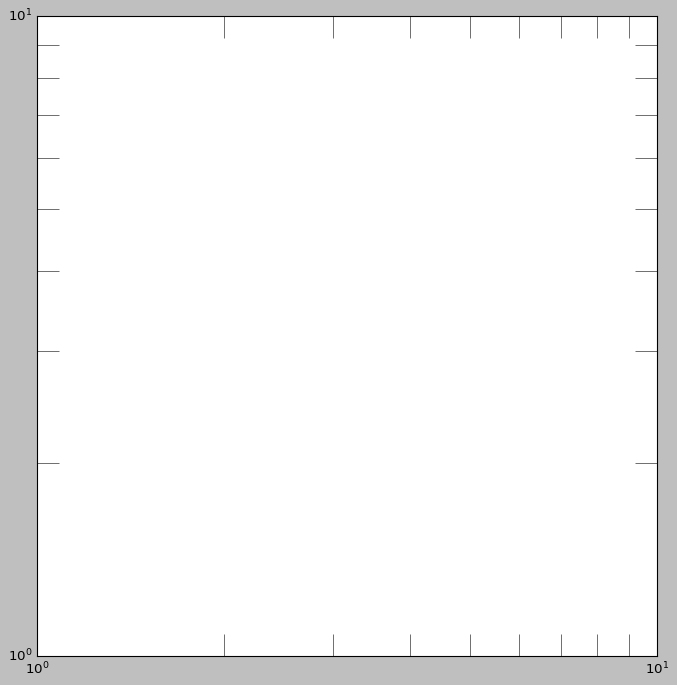

In [2]:
plt.figure(figsize=(10,10))
ax = plt.axes(xscale='log', yscale='log',)
ax.tick_params(which='minor',length=20)
ax.grid();

Aquí vemos que cada marca mayor muestra una marca grande y una etiqueta, mientras que cada marca menor muestra una marca más pequeña sin etiqueta.

Es decir, estas propiedades de las marcas (ubicaciones y etiquetas) se pueden personalizar configurando los objetos ``formatter`` y ``locator`` de cada eje. Examinemos estos para el eje x del gráfico que se acaba de mostrar:

In [3]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [4]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

Vemos que las etiquetas de las marcas mayores y menores tienen sus ubicaciones especificadas por un ``LogLocator`` (lo cual tiene sentido para un gráfico logarítmico). Sin embargo, las etiquetas de las marcas menores tienen el formato ``NullFormatter``: esto indica que no se mostrarán etiquetas.

Ahora mostraremos algunos ejemplos de configuración de estos localizadores y formateadores para varios gráficos.

## Hiding Ticks or Labels

Quizás la operación de formato de marca o etiqueta más común es el acto de ocultar marcas o etiquetas.
Esto se puede hacer usando ``plt.NullLocator()`` y ``plt.NullFormatter()``, como se muestra aquí:

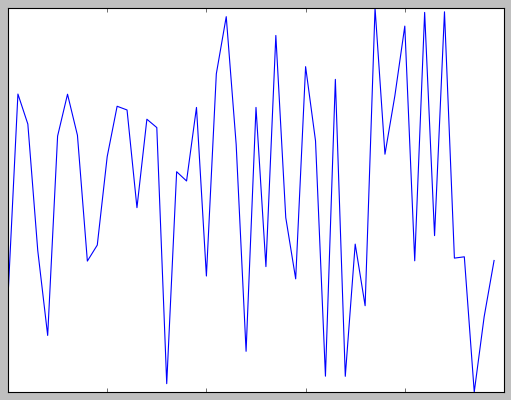

In [5]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

Tenga en cuenta que hemos eliminado las etiquetas (pero conservamos las marcas/líneas de cuadrícula) del eje x, y hemos eliminado las marcas (y, por lo tanto, también las etiquetas) del eje y.
No tener ninguna marca puede ser útil en muchas situaciones; por ejemplo, cuando desea mostrar una cuadrícula de imágenes.
Por ejemplo, considere la siguiente figura, que incluye imágenes de diferentes rostros, un ejemplo que se usa a menudo en problemas de aprendizaje automático supervisado

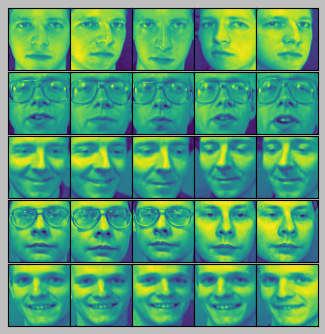

In [6]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# obtener algunos datos de rostros de scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="viridis")

Tenga en cuenta que cada imagen tiene sus propios ejes y hemos establecido los localizadores en nulo porque los valores de las marcas (número de píxel en este caso) no transmiten información relevante para esta visualización en particular.

## Reducing or Increasing the Number of Ticks

Un problema común con la configuración predeterminada es que las subparcelas más pequeñas pueden terminar con etiquetas abarrotadas.
Podemos ver esto en la cuadrícula de la parcela que se muestra aquí:

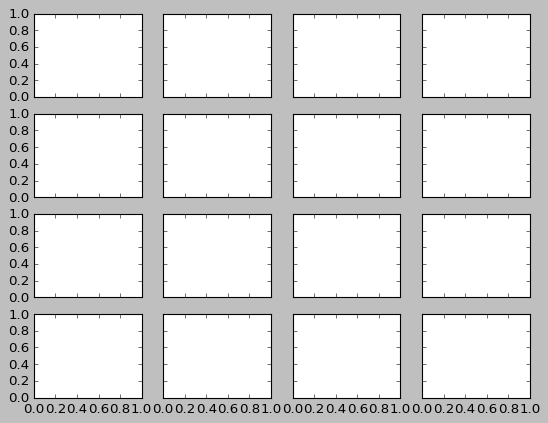

In [7]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

En particular, en el caso de las marcas x, los números casi se superponen y hacen que sea bastante difícil descifrarlas.
Podemos solucionar esto con ``plt.MaxNLocator()``, que nos permite especificar la cantidad máxima de marcas que se mostrarán.
Dado este número máximo, Matplotlib utilizará lógica interna para elegir las ubicaciones de las marcas en particular:

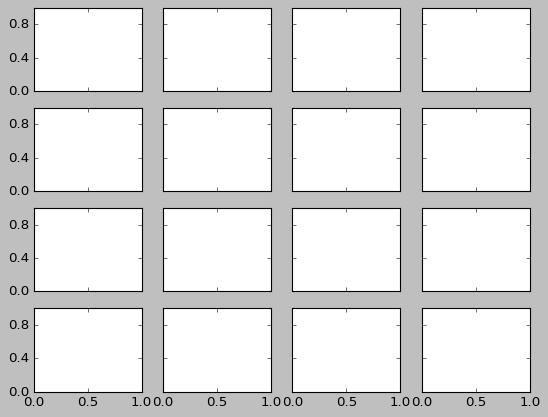

In [8]:
# para cada eje, establezca el localizador principal x e y
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(2))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

fig

Esto hace que todo sea mucho más claro. Si desea tener aún más control sobre la ubicación de las marcas espaciadas regularmente, también puede usar ``plt.MultipleLocator``, que analizaremos en la siguiente sección.

## Fancy Tick Formats

El formato del default de Matplotlib puede dejar mucho que desear: funciona bien como un valor predeterminado amplio, pero a veces es necesario hacer algo más. Considere este gráfico de un seno y un coseno:

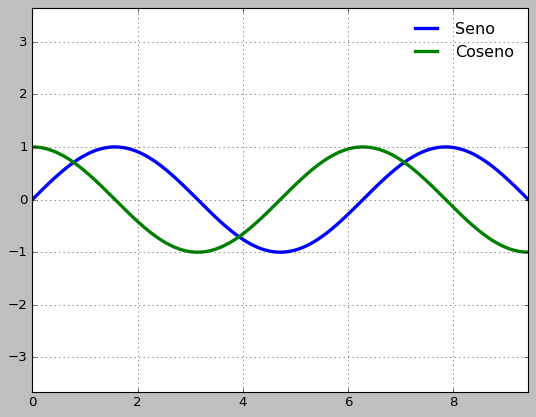

In [10]:
# Graficar una curva de seno y coseno
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Seno')
ax.plot(x, np.cos(x), lw=3, label='Coseno')

# Configurar cuadrícula, leyenda y límites
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

Hay un par de cambios que nos gustaría hacer. Primero, es más natural que estos datos espacien las marcas y las líneas de la cuadrícula en múltiplos de $\pi$. Podemos hacer esto estableciendo un ``MultipleLocator``, que ubica las marcas en un múltiplo del número que proporciones. Por si acaso, agregaremos marcas mayores y menores en múltiplos de $\pi/4$:

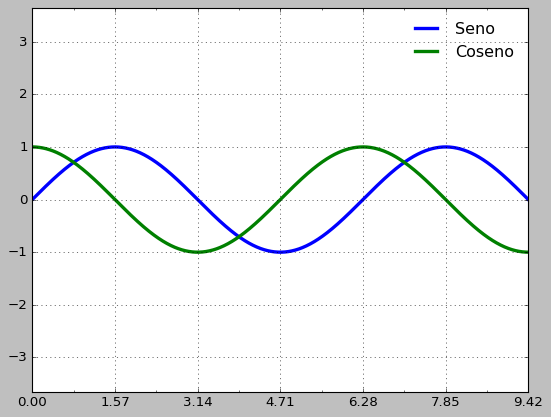

In [11]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

Pero ahora estas etiquetas de ticks se ven un poco ridículas: podemos ver que son múltiplos de $\pi$, pero la representación decimal no lo transmite de inmediato.
Para solucionar esto, podemos cambiar el formateador de ticks. No hay un formateador incorporado para lo que queremos hacer, por lo que en su lugar usaremos ``plt.FuncFormatter``, que acepta una función definida por el usuario que brinda un control detallado sobre las salidas de ticks:

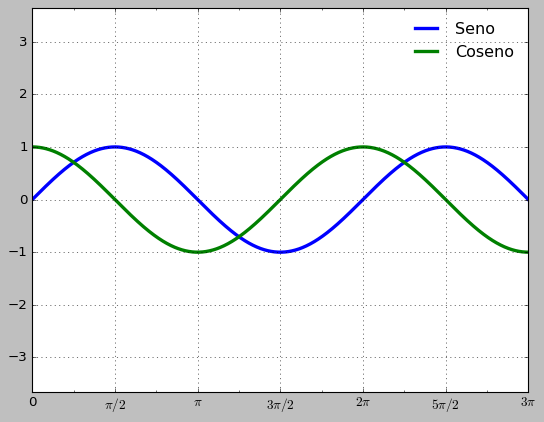

In [12]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

¡Esto es mucho mejor! Observe que hemos hecho uso del soporte LaTeX de Matplotlib, especificado al encerrar la cadena entre signos de dólar. Esto es muy conveniente para la visualización de símbolos y fórmulas matemáticas: en este caso, ``"$\pi$"`` se representa como el carácter griego $\pi$.

``plt.FuncFormatter()`` ofrece un control extremadamente preciso sobre la apariencia de las marcas de su gráfico y resulta muy útil al preparar gráficos para su presentación o publicación.

## Summary of Formatters and Locators


Hemos mencionado un par de los formateadores y localizadores disponibles.
Concluiremos esta sección enumerando brevemente todas las opciones de localizadores y formateadores integrados. Para obtener más información sobre cualquiera de ellos, consulte las cadenas de documentación o la documentación en línea de Matplotlib.
Cada uno de los siguientes está disponible en el espacio de nombres ``plt``:

Locator Class | Descripción
---------------------|-----------------
``NullLocator`` | Sin marcas
``FixedLocator`` | Las ubicaciones de las marcas son fijas
``IndexLocator`` | Localizador para gráficos de índice (p. ej., donde x = range(len(y)))
``LinearLocator`` | Marcas espaciadas uniformemente de min a max
``LogLocator`` | Marcas logarítmicas de min a max
``MultipleLocator`` | Las marcas y el rango son un múltiplo de la base
``MaxNLocator`` | Encuentra hasta un número máximo de marcas en ubicaciones adecuadas
``AutoLocator`` | (Default.) MaxNLocator con valores predeterminados simples.
``AutoMinorLocator`` | Localizador de marcas menores


Formatter Class | Descripción
----------------------|---------------
``NullFormatter`` | Sin etiquetas en las marcas
``IndexFormatter`` | Establece las cadenas a partir de una lista de etiquetas
``FixedFormatter`` | Establece las cadenas manualmente para las etiquetas
``FuncFormatter`` | Función definida por el usuario que establece las etiquetas
``FormatStrFormatter``| Utiliza una cadena de formato para cada valor
``ScalarFormatter`` | (Default.) Formateador para valores escalares
``LogFormatter`` | Formateador predeterminado para ejes logarítmicos

Veremos más ejemplos de esto en el resto del libro.